Importing necessary tools

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

Loading data into *iris*

In [0]:
iris = load_iris()

In [22]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

x is the data

y is the answers I wanted prediction

In [0]:
x = iris.data
y = iris.target

In [24]:
print('x size is', x.shape)
print('y size is', y.shape)

x size is (150, 4)
y size is (150,)


Spliting the traing data and the testing data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [26]:
print('x_train size is', x_train.shape)
print('x_test  size is', x_test.shape)

x_train size is (112, 4)
x_test  size is (38, 4)


Creating a model with max decision depth 2.

Increasing the *max_depth* will make the model better but too much and it will start to memorize the training data causing it to overfit.

In [0]:
estimator = DecisionTreeClassifier(max_depth=2)

In [28]:
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Training the model, letting it generalize the given data.

In [29]:
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

After training the model, we will use it on the test data which we splited previously

In [0]:
y_predict = estimator.predict(x_test)

In [31]:
y_predict, y_test

(array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2]),
 array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
        0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1]))

In [32]:
correct_labels = sum(y_predict == y_test)
correct_labels

34

In [33]:
len(y_predict)

38

In [34]:
print('Accuracy:', correct_labels/len(y_predict))

Accuracy: 0.8947368421052632


Accuracy is 89% but this can be better by increasing the *max_depth* parameter

Using graphviz to visualize the tree graph our model made

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

In [36]:
!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


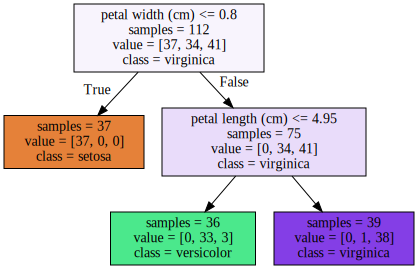

In [37]:
import graphviz as gv

with open("tree.dot") as f:
  dot_graph = f.read()
display(gv.Source(dot_graph))

This time we will make the *max_depth* 5

In [0]:
estimator = DecisionTreeClassifier(max_depth=5)

In [39]:
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
y_predict = estimator.predict(x_test)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [42]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [43]:
correct_labels = sum(y_predict == y_test)
correct_labels

37

In [44]:
len(y_predict)

38

In [45]:
print("Accuracy:", correct_labels/len(y_predict))

Accuracy: 0.9736842105263158


The accuracy increased from 89% to 97%

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

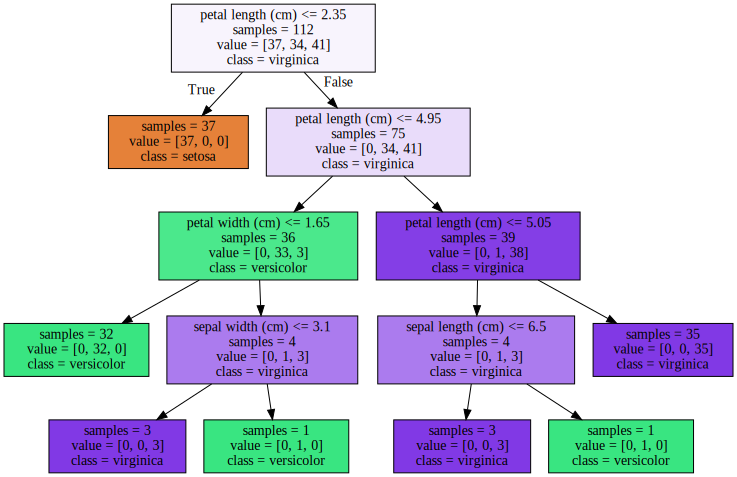

In [47]:
import graphviz as gv

with open("tree.dot") as f:
  dot_graph = f.read()
display(gv.Source(dot_graph))

Now we will try to increase and decrease the *max_depth* and see if we can further increase the accuracy

In [0]:
my_max_depth = 10 #@param {type:"slider", min:1, max:10, step:1}

In [49]:
estimator = DecisionTreeClassifier(max_depth=my_max_depth)
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
y_predict = estimator.predict(x_test)

In [52]:
correct_labels = sum(y_predict == y_test)
correct_labels

37

In [53]:
len(y_predict)

38

In [54]:
print("Accuracy:", correct_labels/len(y_predict))

Accuracy: 0.9736842105263158


In [0]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file="tree.dot", class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

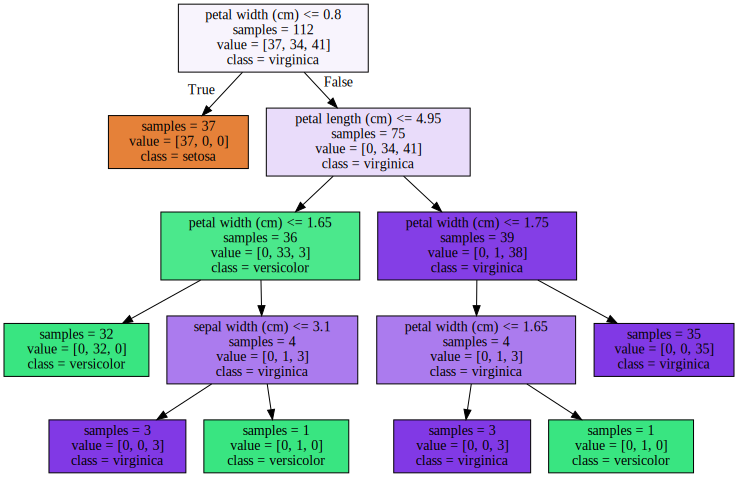

In [56]:
import graphviz as gv

with open("tree.dot") as f:
  dot_graph = f.read()
display(gv.Source(dot_graph))

After playing with the max_depth parameter, we can see that after a max depth of 4, our model always gives the same results. We can conclude that making our model's decision tree more complex doesn't make it more accurate. Inorder to get a better accuracy we must use another type of model.
